## Imports

In [1]:
import pandas as pd 
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize

#### Code 2.1

In [2]:
good_chains = stats.beta.rvs(2, 5,size=(2, 2000))
bad_chains0 = np.random.normal(np.sort(good_chains, axis=None), 0.05,
                               size=4000).reshape(2, -1)

bad_chains1 = good_chains.copy()
for i in np.random.randint(1900, size=4):
    bad_chains1[i%2:,i:i+100] = np.random.beta(i, 950, size=100)

chains = {"good_chains":good_chains,
          "bad_chains0":bad_chains0,
          "bad_chains1":bad_chains1}

### 2.4.1 Effective Sample Size

#### Code 2.2

In [3]:
az.ess(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 4.219e+03
    bad_chains0  float64 2.454
    bad_chains1  float64 101.3

#### Code 2.3

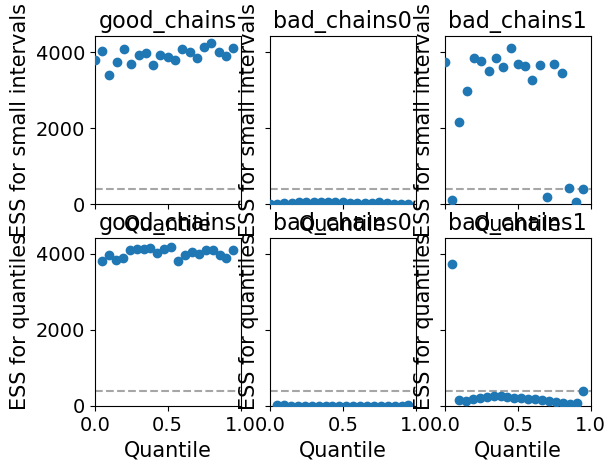

In [9]:
_, axes = plt.subplots(2,3,sharey=True, sharex=True)
az.plot_ess(chains, kind="local", ax=axes[0]);
az.plot_ess(chains, kind="quantile", ax=axes[1]);

#### Code 2.4

In [6]:
az.rhat(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 1.0
    bad_chains0  float64 2.367
    bad_chains1  float64 1.021

#### Code 2.5

In [7]:
az.mcse(chains)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    good_chains  float64 0.002435
    bad_chains0  float64 0.1071
    bad_chains1  float64 0.01869

#### Code 2.6

array([<AxesSubplot: title={'center': 'good_chains'}, xlabel='Quantile', ylabel='MCSE for quantiles'>,
       <AxesSubplot: title={'center': 'bad_chains0'}, xlabel='Quantile', ylabel='MCSE for quantiles'>,
       <AxesSubplot: title={'center': 'bad_chains1'}, xlabel='Quantile', ylabel='MCSE for quantiles'>],
      dtype=object)

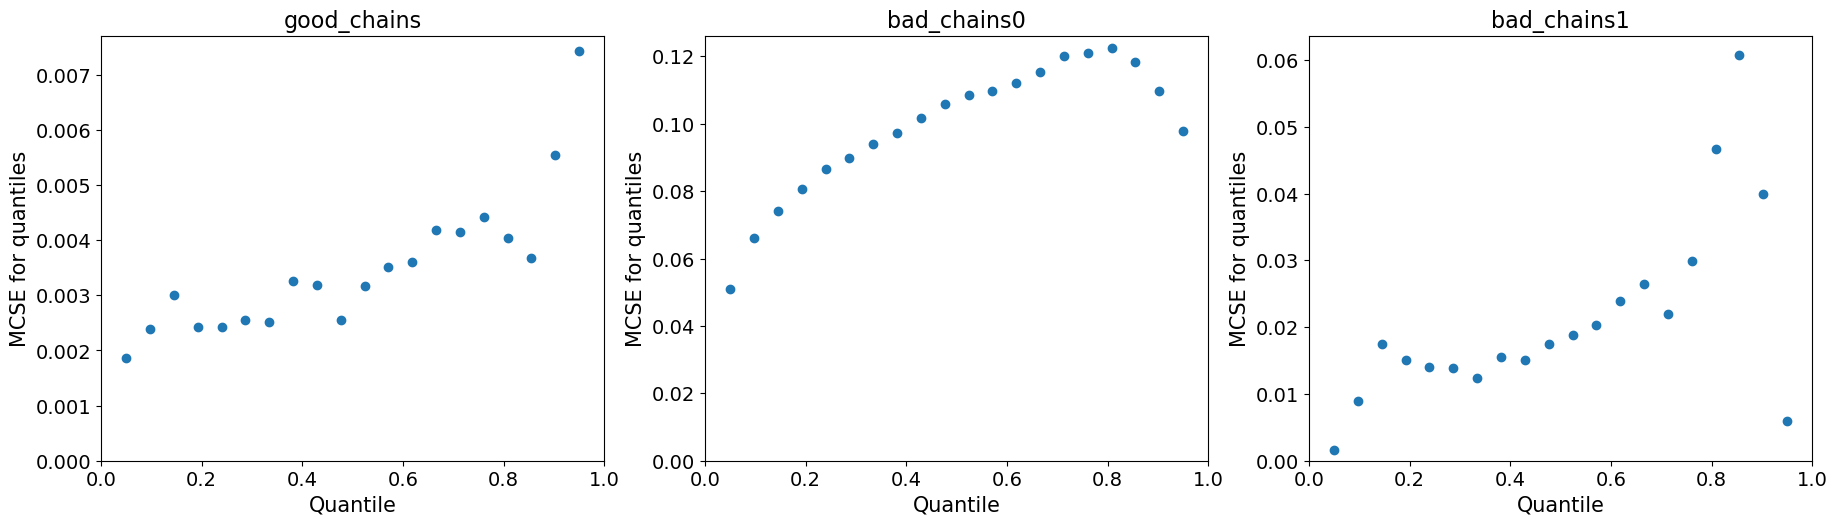

In [8]:
az.plot_mcse(chains)

#### Code 2.7

In [10]:
az.summary(chains, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
good_chains,0.002,0.002,4219.0,3805.0,1.00
bad_chains0,0.107,0.087,2.0,11.0,2.37
bad_chains1,0.019,0.014,101.0,390.0,1.02


### 2.4.4 Trace Plots

#### Code 2.8

array([[<AxesSubplot: title={'center': 'good_chains'}>,
        <AxesSubplot: title={'center': 'good_chains'}>],
       [<AxesSubplot: title={'center': 'bad_chains0'}>,
        <AxesSubplot: title={'center': 'bad_chains0'}>],
       [<AxesSubplot: title={'center': 'bad_chains1'}>,
        <AxesSubplot: title={'center': 'bad_chains1'}>]], dtype=object)

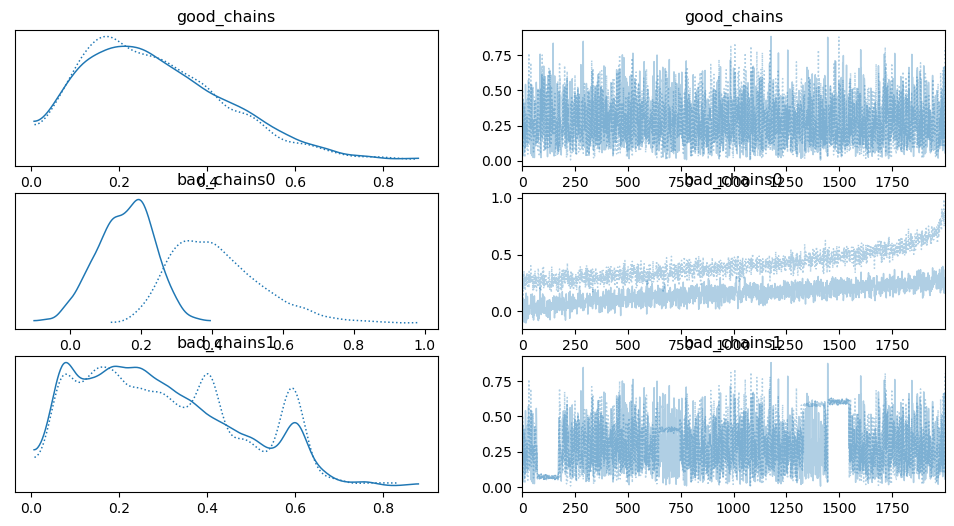

In [11]:
az.plot_trace(chains)

### Autocorrelation Plots

#### Code 2.9

array([<AxesSubplot: title={'center': 'good_chains'}>,
       <AxesSubplot: title={'center': 'bad_chains0'}>,
       <AxesSubplot: title={'center': 'bad_chains1'}>], dtype=object)

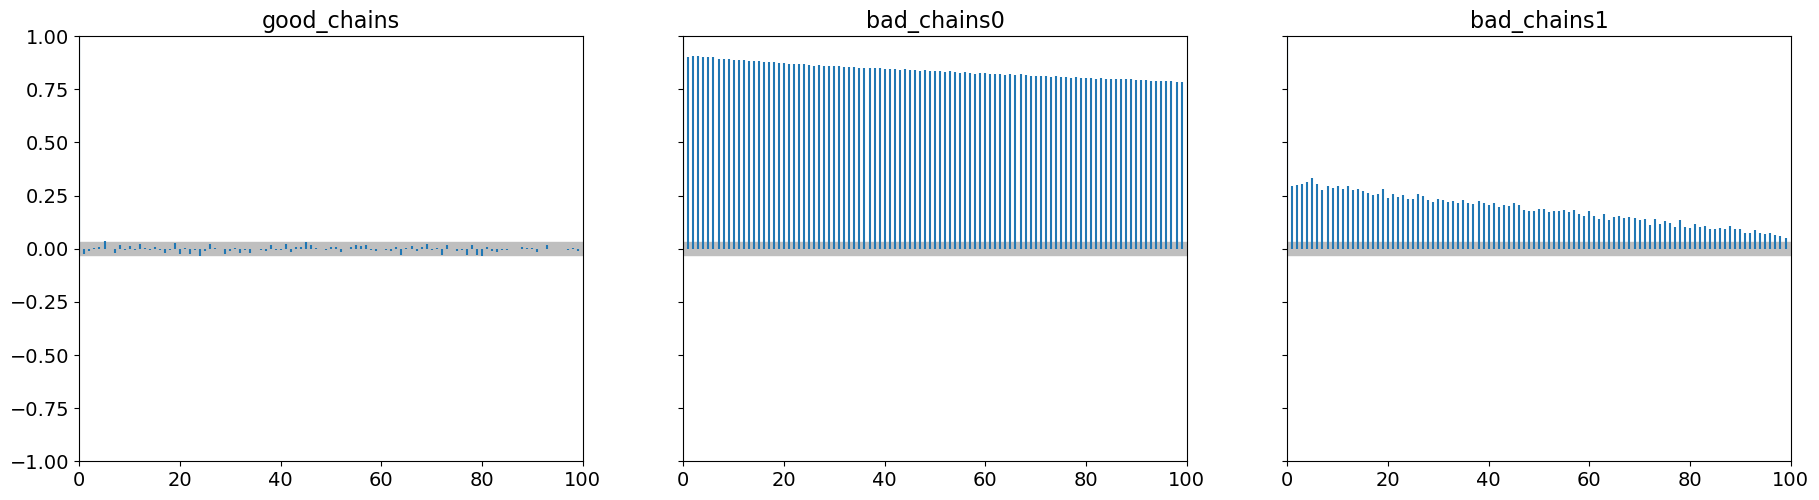

In [12]:
az.plot_autocorr(chains, combined=True)

### 2.4.6 Rank Plots
#### Code 2.10

array([<AxesSubplot: title={'center': 'good_chains'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot: title={'center': 'bad_chains0'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <AxesSubplot: title={'center': 'bad_chains1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

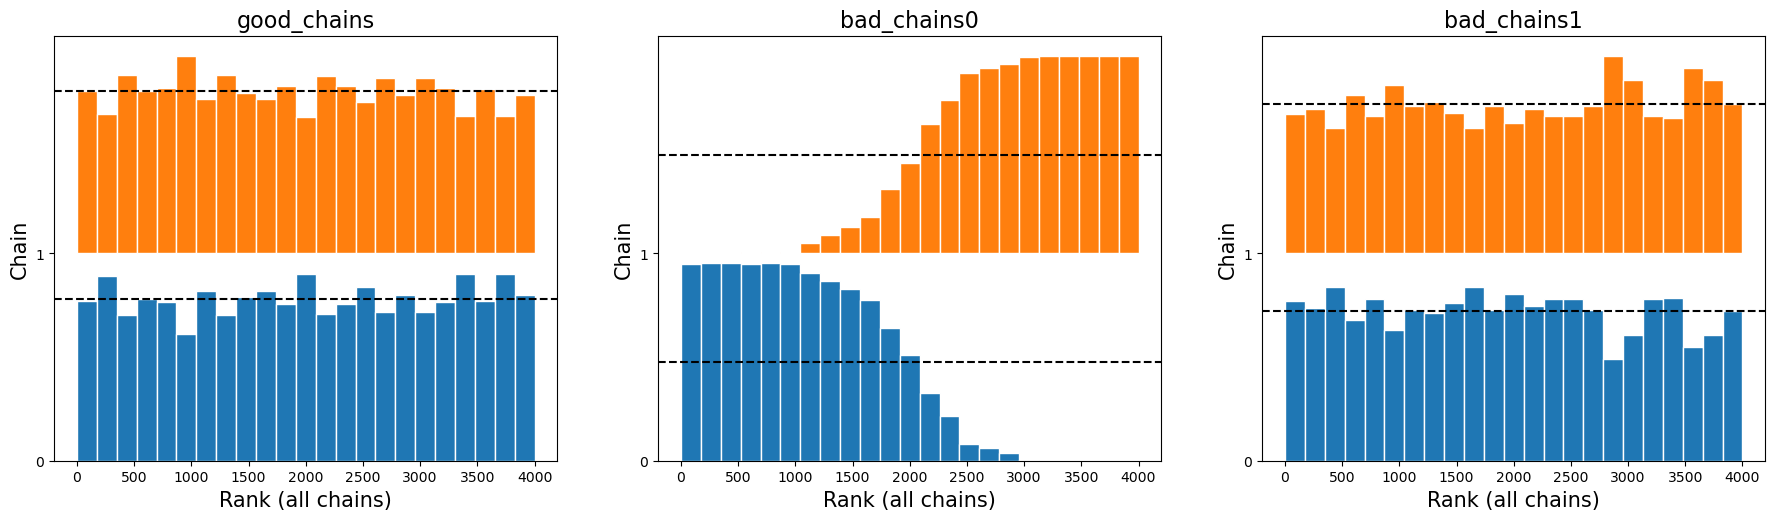

In [14]:
az.plot_rank(chains, kind="bars")

#### Code 2.11

array([<AxesSubplot: title={'center': 'good_chains'}, xlabel='Rank (all chains)'>,
       <AxesSubplot: title={'center': 'bad_chains0'}, xlabel='Rank (all chains)'>,
       <AxesSubplot: title={'center': 'bad_chains1'}, xlabel='Rank (all chains)'>],
      dtype=object)

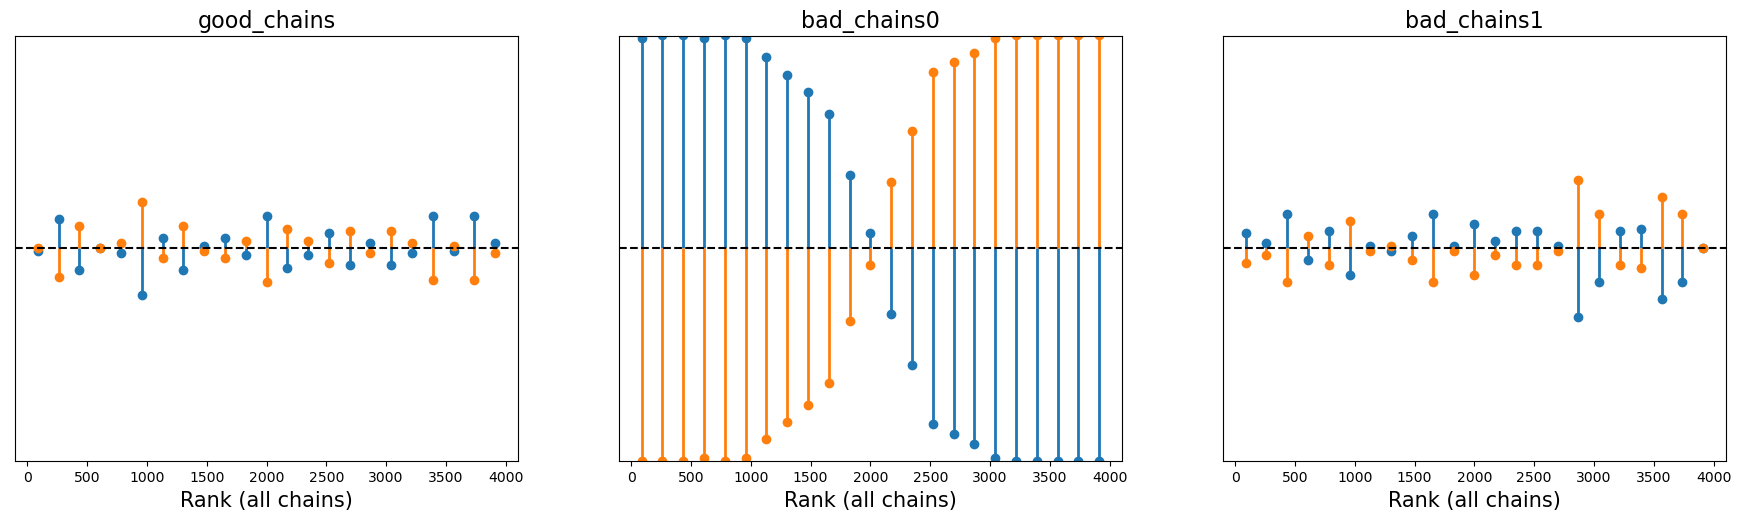

In [15]:
az.plot_rank(chains, kind="vlines")

array([[<AxesSubplot: title={'center': 'good_chains'}>,
        <AxesSubplot: title={'center': 'good_chains'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot: title={'center': 'bad_chains0'}>,
        <AxesSubplot: title={'center': 'bad_chains0'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot: title={'center': 'bad_chains1'}>,
        <AxesSubplot: title={'center': 'bad_chains1'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

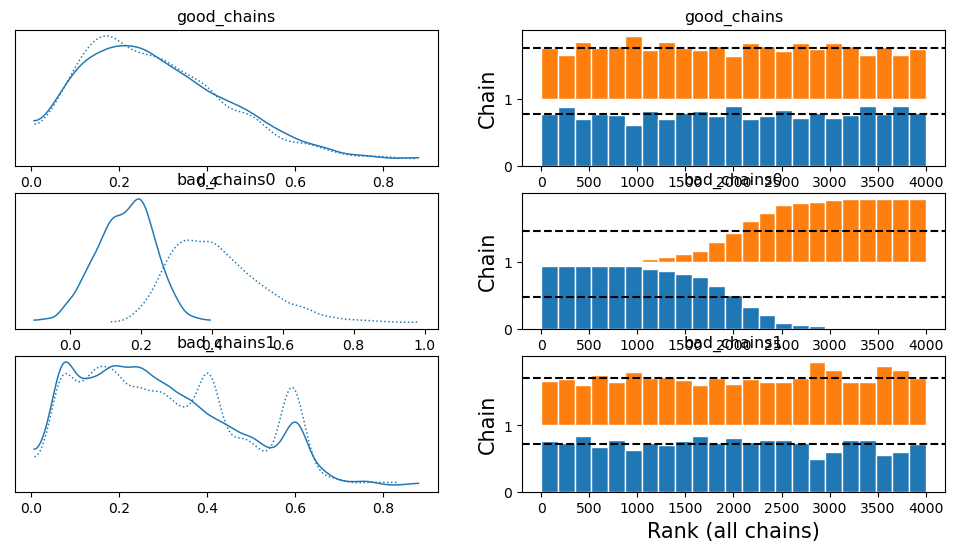

In [17]:
az.plot_trace(chains, kind="rank_bars")

array([[<AxesSubplot: title={'center': 'good_chains'}>,
        <AxesSubplot: title={'center': 'good_chains'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'bad_chains0'}>,
        <AxesSubplot: title={'center': 'bad_chains0'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'bad_chains1'}>,
        <AxesSubplot: title={'center': 'bad_chains1'}, xlabel='Rank (all chains)'>]],
      dtype=object)

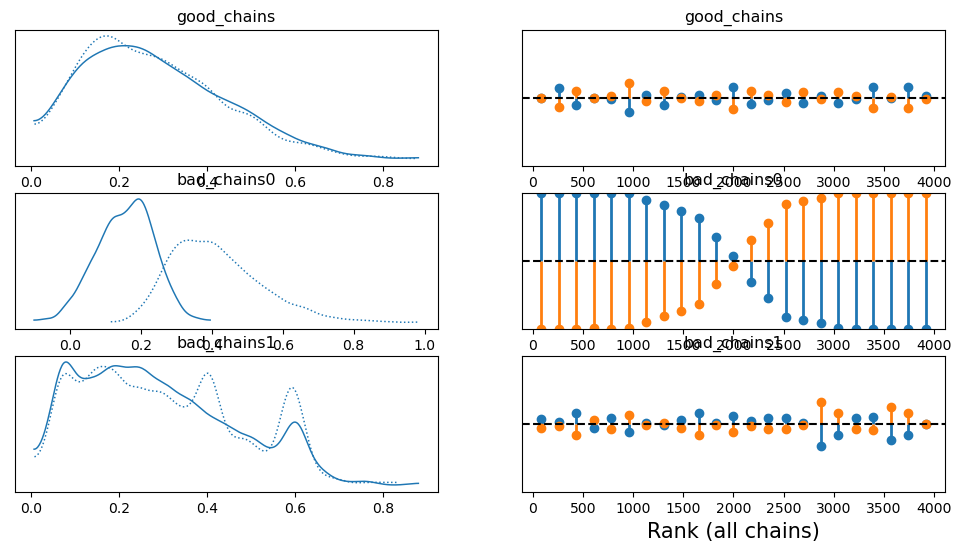

In [16]:
az.plot_trace(chains, kind="rank_vlines")

### 2.4.7 Divergences

#### Code 2.12

In [18]:
with pm.Model() as model_0:
    theta1 = pm.Normal("theta1", 0, 1, testval=0.1)
    theta2 = pm.Uniform("theta2", -theta1, theta1)
    idata_0 = pm.sample(return_inferencedata=True)
    

/var/folders/gg/0m4l7pvs5zq9d8p4tzflypdc0000gn/T/ipykernel_47726/3506018460.py:2: FutureWarning: The `testval` argument is deprecated; use `initval`.
  theta1 = pm.Normal("theta1", 0, 1, testval=0.1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta1, theta2]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


array([[<AxesSubplot: title={'center': 'theta1'}>,
        <AxesSubplot: title={'center': 'theta1'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'theta2'}>,
        <AxesSubplot: title={'center': 'theta2'}, xlabel='Rank (all chains)'>]],
      dtype=object)

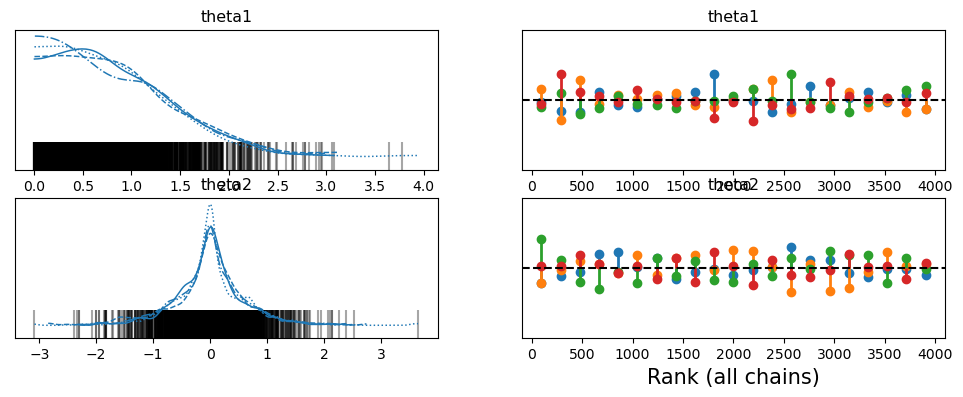

In [19]:
az.plot_trace(idata_0, kind="rank_vlines")

<AxesSubplot: xlabel='theta1', ylabel='theta2'>

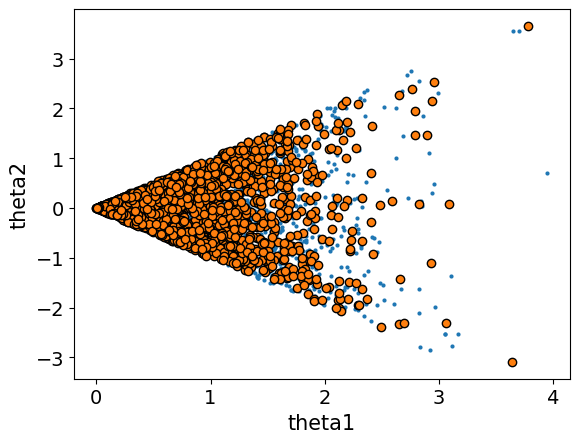

In [22]:
az.plot_pair(idata_0, divergences=True)

#### Code 2.13

In [23]:
with pm.Model() as model_1:
    theta1 = pm.HalfNormal("theta1", 1 / (1-2/np.pi)**0.5)
    theta2 = pm.Uniform("theta2", -theta1, theta1)
    idata_1 = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta1, theta2]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<AxesSubplot: title={'center': 'theta1'}>,
        <AxesSubplot: title={'center': 'theta1'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'theta2'}>,
        <AxesSubplot: title={'center': 'theta2'}, xlabel='Rank (all chains)'>]],
      dtype=object)

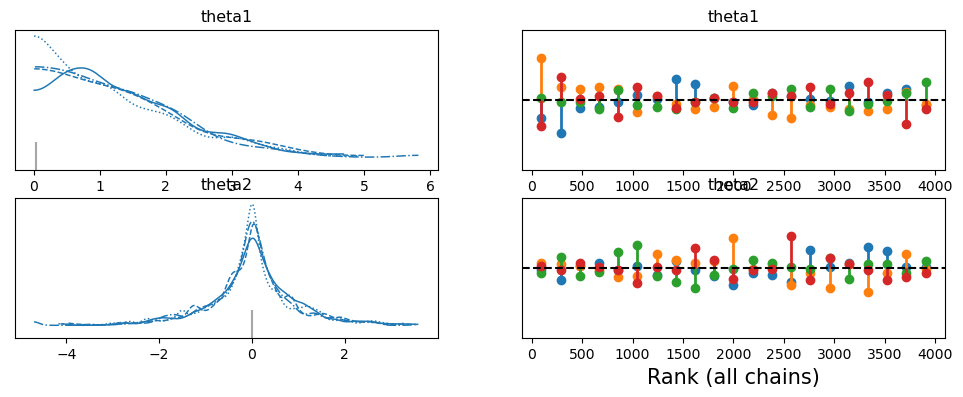

In [25]:
az.plot_trace(idata_1, kind="rank_vlines")

<AxesSubplot: xlabel='theta1', ylabel='theta2'>

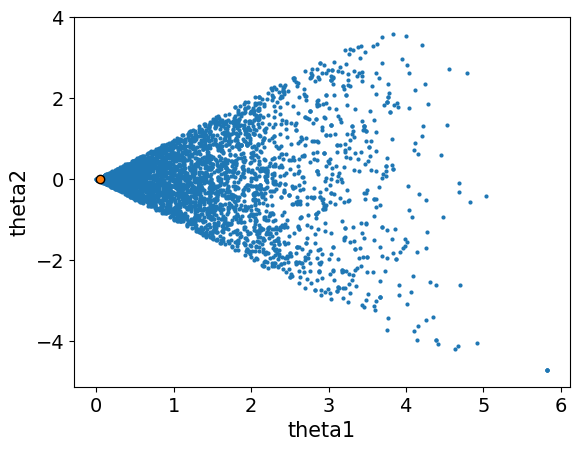

In [26]:
az.plot_pair(idata_1, divergences=True)

#### Code 2.14

In [30]:
with pm.Model() as model_ibis:
    theta1 = pm.HalfNormal("theta1", 1 / (1-2/np.pi)**0.5)
    theta2 = pm.Uniform("theta2", -theta1, theta1)
    idata_ibis = pm.sample(target_accept=0.95, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta1, theta2]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<AxesSubplot: title={'center': 'theta1'}>,
        <AxesSubplot: title={'center': 'theta1'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'theta2'}>,
        <AxesSubplot: title={'center': 'theta2'}, xlabel='Rank (all chains)'>]],
      dtype=object)

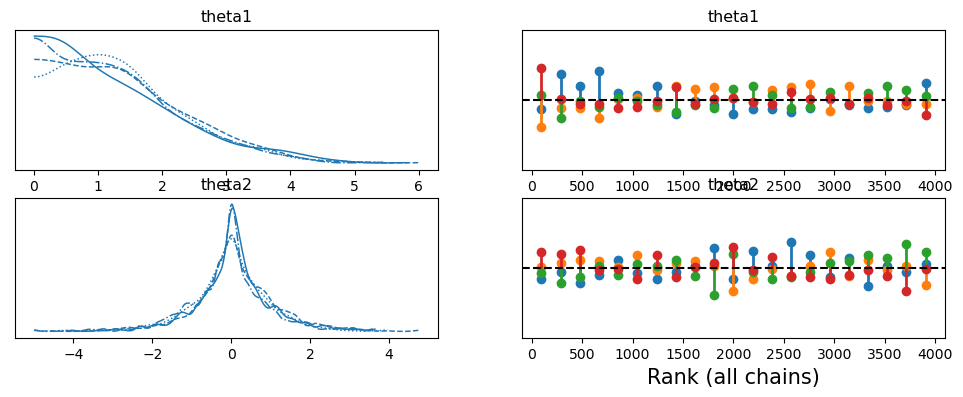

In [32]:
az.plot_trace(idata_ibis, kind="rank_vlines")

<AxesSubplot: xlabel='theta1', ylabel='theta2'>

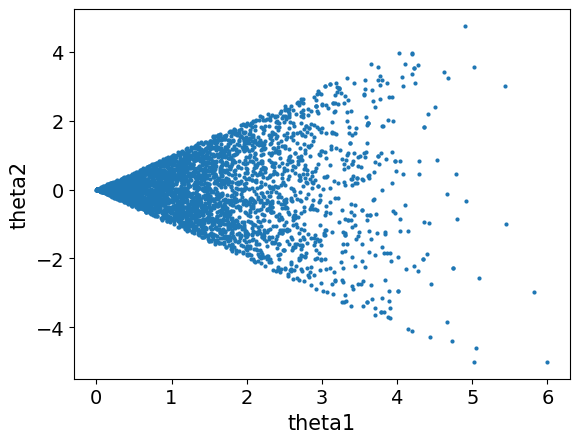

In [33]:
az.plot_pair(idata_ibis, divergences=True)

In [34]:
az.summary(idata_ibis, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta1,0.023,0.017,1209.0,826.0,1.0
theta2,0.024,0.017,1694.0,2306.0,1.0


## 2.5 Model Comparison